In [1]:
cd /content/drive/My Drive/medium blogs/"Accelerating ML Models using Microsoft's HummingBird"

/content/drive/My Drive/medium blogs/Accelerating ML Models using Microsoft's HummingBird


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from hummingbird.ml import convert


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ONNX runtime not installed. Please check https://github.com/microsoft/onnxruntime#installation for instructions.
ONNX runtime not installed. Please check https://github.com/microsoft/onnxruntime#installation for instructions.


In [3]:
!pip install hummingbird-ml

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 7.1MB 7.2MB/s 
     |████████████████████████████████| 7.4MB 41.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
data=pd.read_csv('winequality_red.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


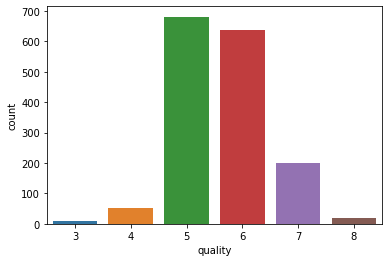

In [5]:
sns.countplot(x='quality',data=data)

In [6]:
quality=data['quality']

In [7]:
data['quality']=pd.cut(data['quality'],bins=(2,6.5,8),labels=[0,1])


In [8]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [10]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [11]:
data.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [12]:
data['quality']=data['quality'].astype('int64')

In [13]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


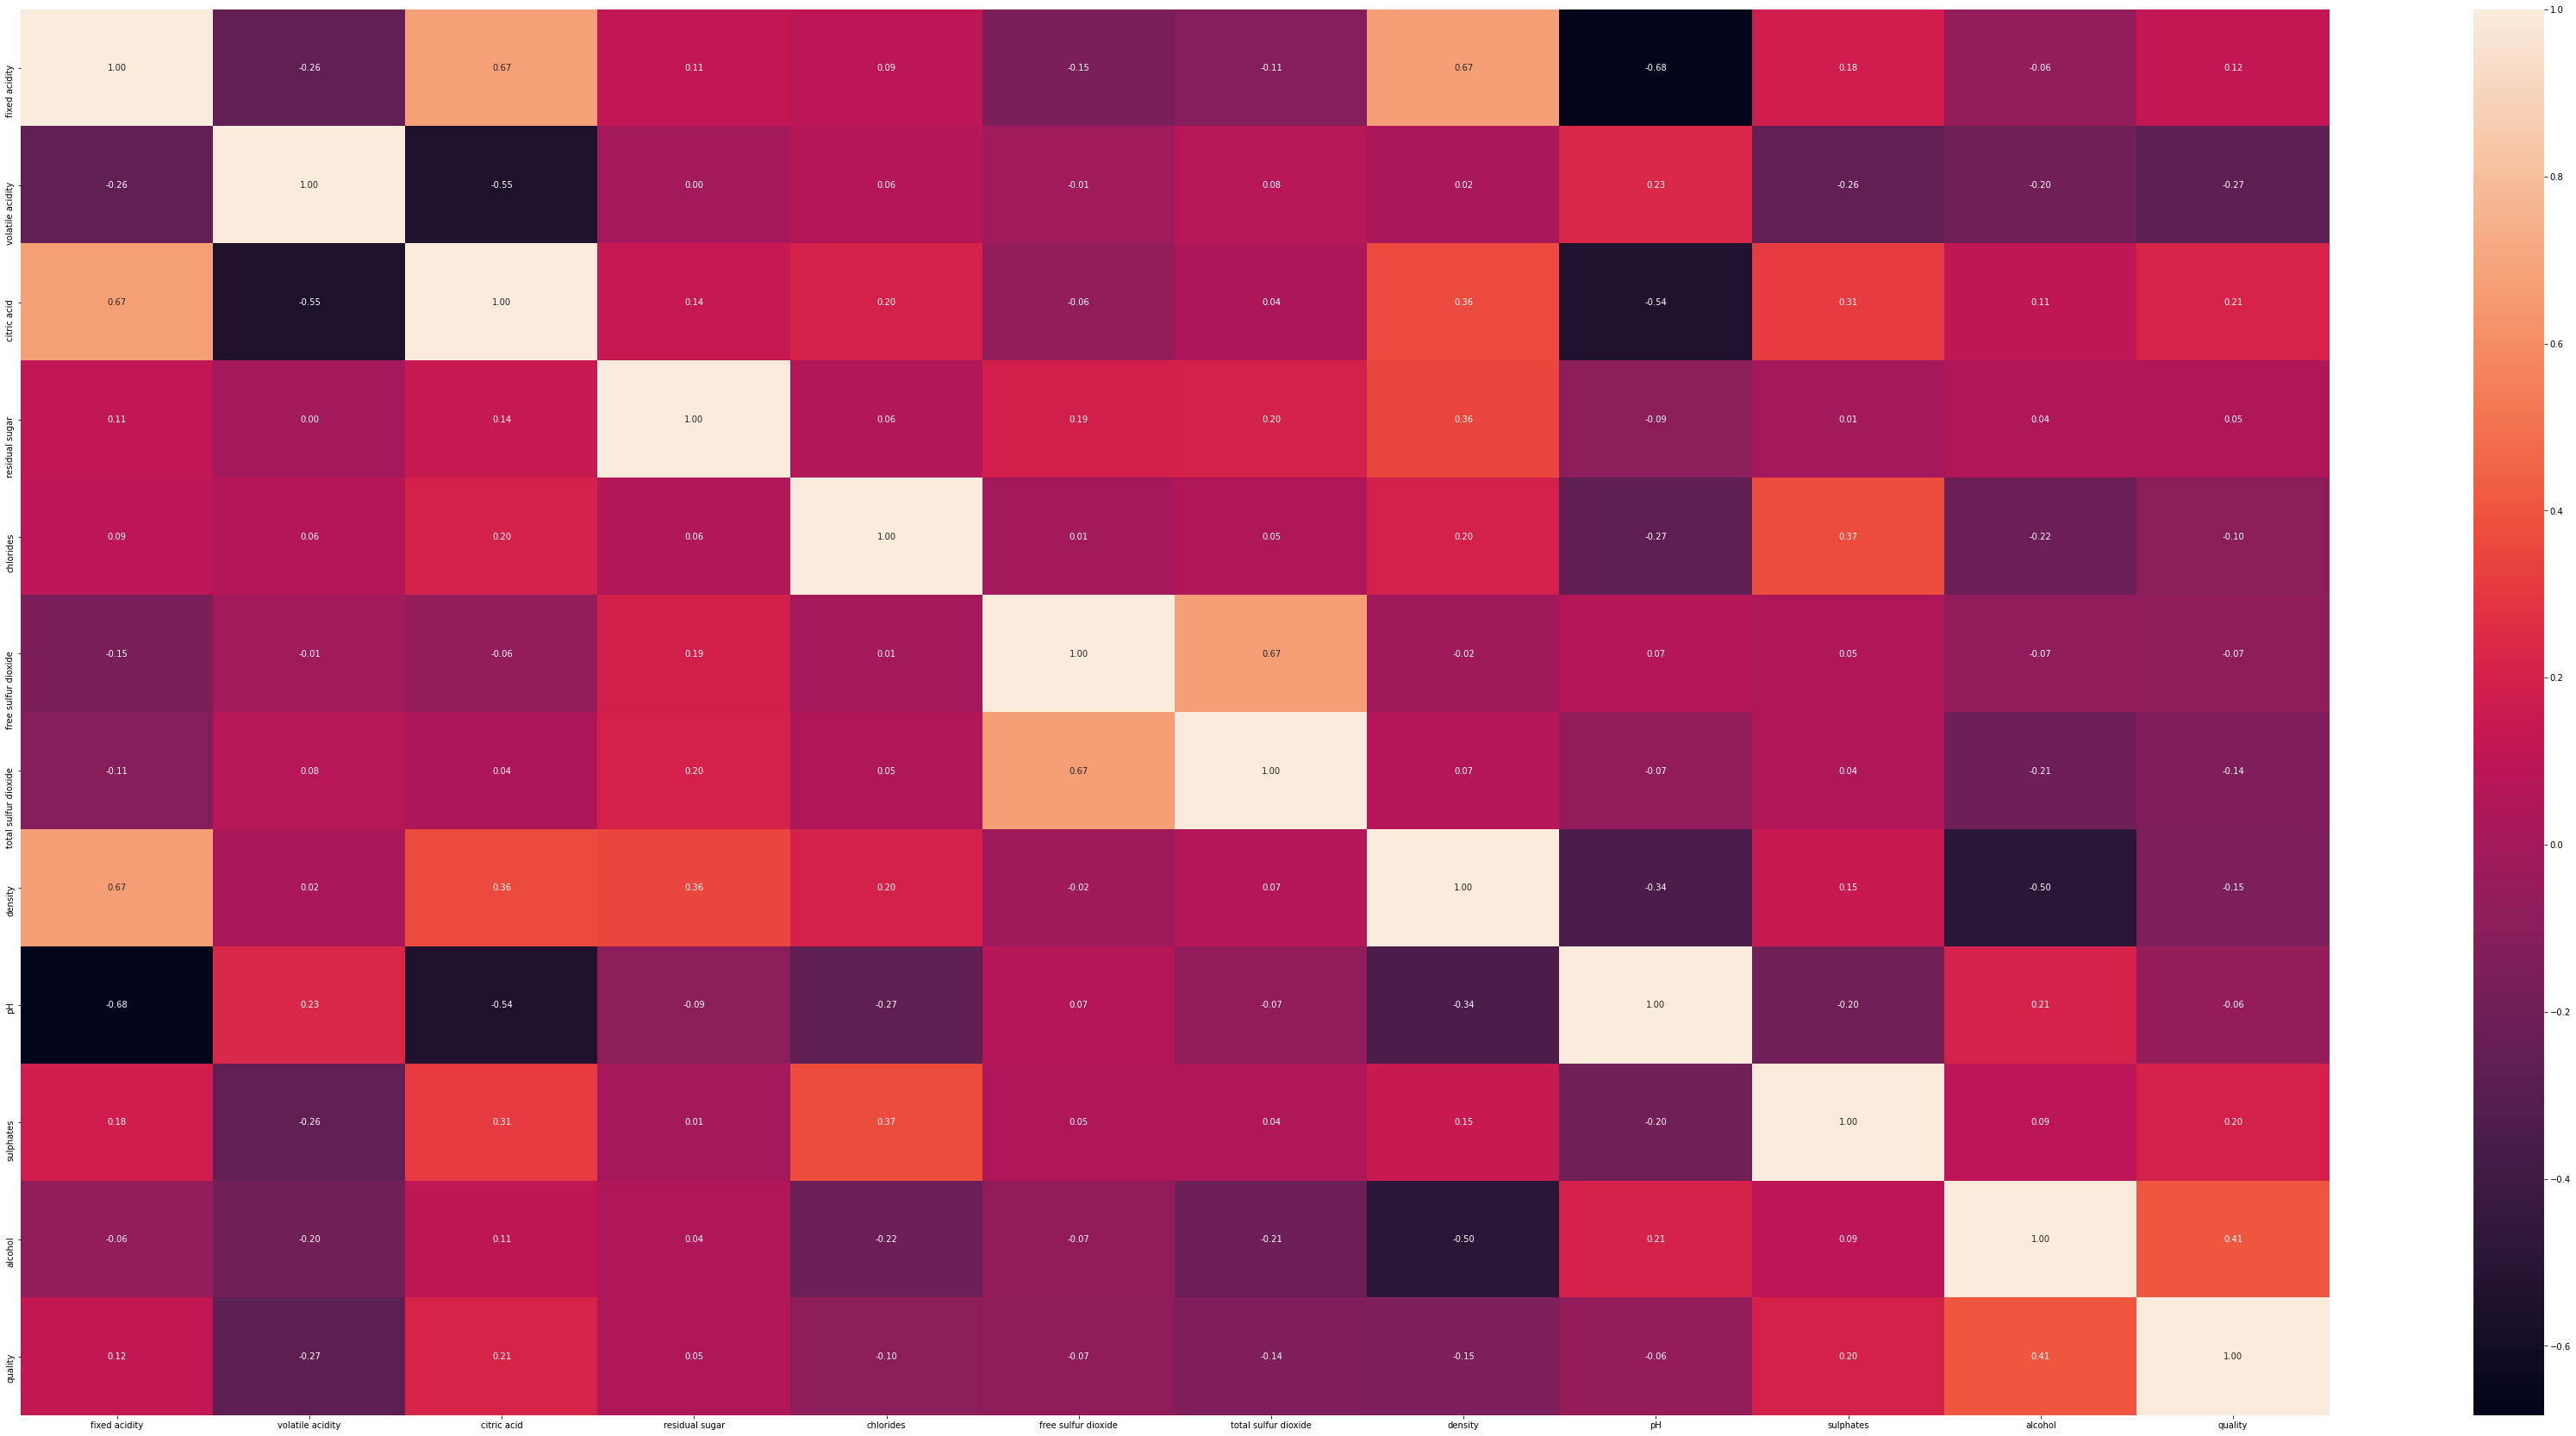

In [14]:
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

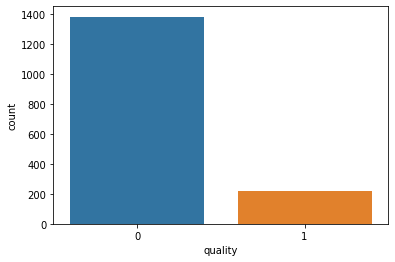

In [15]:
sns.countplot(x='quality',data=data)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)

In [19]:
model=RandomForestClassifier(n_estimators=300)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
%%time
y_pred=model.predict(np.array(x_test))

CPU times: user 55.5 ms, sys: 0 ns, total: 55.5 ms
Wall time: 60.3 ms


In [21]:
import sklearn.metrics as m

In [22]:
m.accuracy_score(y_test,y_pred)

0.9075

In [28]:
list(y_test).count(0)
list(y_test).count(1)


53

In [29]:
print(m.confusion_matrix(y_test,y_pred))

[[335  12]
 [ 25  28]]


In [30]:
model_torch=convert(model,'pytorch')

In [31]:
%%time
y_pred_torch=model_torch.predict(np.array(x_test))

CPU times: user 619 ms, sys: 5.26 ms, total: 624 ms
Wall time: 701 ms


In [32]:
%%time
model_torch.to('cuda')


CPU times: user 2.32 s, sys: 1.01 s, total: 3.33 s
Wall time: 9.45 s


PyTorchBackendModelClassification(
  (operator_map): ModuleDict(
    (SklearnRandomForestClassifier): TreeTraversalDecisionTreeImpl()
  )
)

In [33]:
%%time
y_pred_torch=model_torch.predict(np.array(x_test))

CPU times: user 9.63 ms, sys: 1.31 ms, total: 10.9 ms
Wall time: 67.4 ms
